<h2> These are the analysis scripts and simulation code associated with the last section of the paper </h2>

In [2]:
#First we are going to load in the needed programs
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan
import math 
import ast
from numpy import mean


from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative

<h2> To quantify the correlations as a function of distances on single-chromosomes </h2>
<p> We quantify the correlation as a function of the single-chromosomal distances. We then investigate the correlation as a function of the two variables individually. </p>

In [ ]:
#Here I am going to normalize by the maximal correlation coefficent, each one. 
from scipy import stats

file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values

data = {'Other Gene': [], 'Spear': []}
dfn= pd.DataFrame.from_dict(data)


for i in range(651):
        clear_output(wait=True)
        print(i)
        data = {'Other Gene': [], 'Spear': []}
        dfn= pd.DataFrame.from_dict(data)


        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:

            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                    file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                    trans2=np.load(file)

                    if np.nansum(trans2)>0 and np.abs(i-ii)>0:
                            tensi=[]

                            for dis_2 in range(1, 40, 2): 
                                inds1=np.abs(df['barcode'+str(ii)]-dis_2*100)<100
                                if np.sum(inds1)>10:

                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)

                                    transtemp1=transtemp1[inds1]
                                    transtemp2=transtemp2[inds1]

                                    if np.nansum(transtemp1)>2 and np.nansum(transtemp2)>2:

                                        Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                        vv1=str(dis_2*100)
                                        
                                        tensi.append(Hey)
                                    else:
                                        tensi.append(nan)
                                        
                                        
                                else:
                                    tensi.append(nan)


                            dfn.loc[len(dfn.index)]=[ii, np.array(tensi)]
            
            dfn.to_pickle("Exp.pkl")        
        
        
    

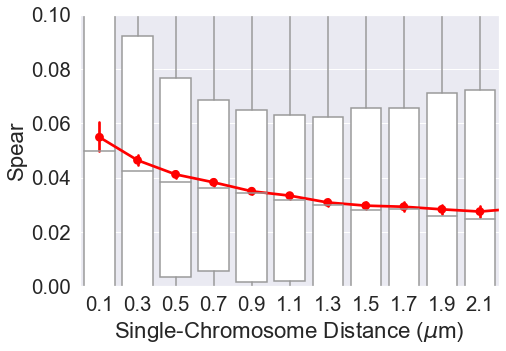

In [5]:
sns.set(font_scale=1.85)
fig=plt.figure()
df2=pd.read_pickle("Exp.pkl")
ax = sns.boxplot(x='Single-Chromosome Distance ($\mu$m)', y='Spear',
                    data=df2, color='white')
#print(un)

ax=sns.pointplot(x='Single-Chromosome Distance ($\mu$m)', y='Spear',
                    data=df2, estimator=mean,color='red')
#plt.legend(loc='upper left',fontsize=15)
fig.set_size_inches(7.5,5)
plt.xlim(-.5,10.5)
plt.ylim(0,.1)
plt.show()
#fig.savefig("Figures/Sim/"+str(un)+"Physical_Distance.png", dpi=300, bbox_inches='tight')
fig.savefig("Figures/Exp_Physical_Distance.png", dpi=300, bbox_inches='tight')

<h3> Now we are going to do the analysis for the heatmap </h3> 

In [8]:
#This is going to be the heatmap code for the physical distances

# from scipy import stats



# file = "Single_Median/Median"#+str(barcode1)
# ff=pd.read_csv(file)
# Med=ff.values

# Genomic_distance=np.copy(Med)
# Genomic_distance=Genomic_distance*0
# for i in range(651):
#     for ii in range(651): 
#         Genomic_distance[i,ii]=np.abs(i-ii)
        
# Heat_map=np.zeros([16,400])
# Heat_map_divided=np.zeros([16,400])
# Heat_map_SEM=np.zeros([16,400])


# file = "Single_Median/Median"#+str(barcode1)
# ff=pd.read_csv(file)
# Med=ff.values

# Genomic_distance=np.copy(Med)
# Genomic_distance=Genomic_distance*0
# for i in range(651):
#     for ii in range(651): 
#         Genomic_distance[i,ii]=np.abs(i-ii)
        
        
#Ignore the med_dis, in this case it is the normal single-chromosome distance
for med_dis in range(1, 16): 
    
    print(med_dis)
    count=0;
    
    for gen_dis in range(3, 600, 6):
        clear_output(wait=True)
        print(med_dis, gen_dis)
        Spear_temp=[];
        
        for i in range(651):
            
            file='Transcription_Trajectories/Test'+str(i)+'.npy'
            trans=np.load(file)
            
            if np.nansum(trans)>0:
                file="Distances/Distances_"+str(i)
                df=pd.read_csv(file)
                
                for ii in range(651): 

                        file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                        trans2=np.load(file)
                        
                        if np.nansum(trans2)>0 and np.abs(i-ii)>0:

                            #if np.floor(np.abs(Genomic_distance[i, ii]-gen_dis*50/500))<1:
                            if np.abs(Genomic_distance[i, ii]-gen_dis)<=3:
                                    
                                    inds1=np.abs(df['barcode'+str(ii)]-med_dis*200-100)<100
                                    if np.sum(inds1)>100:
                                        
                                        df_temp=np.copy(df['barcode'+str(ii)])
                                        transtemp1=np.copy(trans)
                                        transtemp2=np.copy(trans2)

                                        transtemp1=transtemp1[inds1]
                                        transtemp2=transtemp2[inds1]
                                        df_temp=df_temp[inds1]

                                        Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                        Spear_temp.append(Hey)    
        
                       
        Heat_map[med_dis, count]=np.nanmean(Spear_temp)      
        Heat_map_SEM[med_dis, count]=len(Spear_temp)
        
        count=count+1; 
        
    file='Heatmap_transcription_100'
    np.save(file, Heat_map)

    file='Heatmap_transcription_SEM_100'
    np.save(file, Heat_map_SEM)
        

file='Heatmap_transcription_100'
np.save(file, Heat_map)

file='Heatmap_transcription_SEM_100'
np.save(file, Heat_map_SEM)

3 171


KeyboardInterrupt: 

In [9]:
file='Heatmap_transcription_100'
np.save(file, Heat_map)

file='Heatmap_transcription_SEM_100'
np.save(file, Heat_map_SEM)

<h3> Generate the heatmap figure for single chromosome distance </h3>

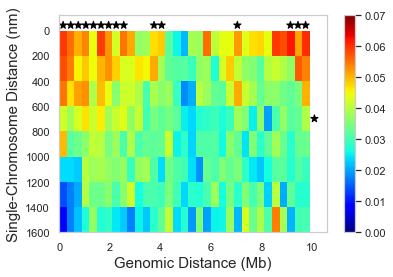

In [11]:

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1)
sns.set(style="whitegrid")

file='Heatmap_transcription_SEM_100.npy'
Heat_map_SEM=np.load(file)
file='Heatmap_transcription_100.npy'
Heat_map=np.load(file)

Heat_map[Heat_map_SEM<10]=nan
fig=plt.figure()





#Here we are going to perform the statistical test to see if it is correlated
Temp=[];
Temp2=[]
for i in range(1,9):
    inds=Heat_map[i,0:33]>-10000
    inds2=np.array(range(33))
    tempss=Heat_map[i,0:33]
    if len(tempss[inds])>1:
        Hey=stats.spearmanr(inds2[inds], tempss[inds])[0]
        Temp.append(Hey)

        Hey=stats.spearmanr(inds2[inds], tempss[inds])[1]
        Temp2.append(Hey)

    else:
        Temp.append(nan)
        Temp2.append(nan)


Temp2=np.array(Temp2)
Temp2[np.array(Temp)>0]=nan
Temp2[Temp2>.01]=nan
Temp2[Temp2<.01]=1

x=np.array(range(8))
y=x*0+10.1
area=Temp2*120/2
colors=y*0+.1
color=['black']
plt.scatter(y, x*200+100, s=area, c=color, alpha=1, marker="*")




#Here we are going to see if they are correlated along the other dimension. 
Temp=[];
Temp2=[]
for i in range(0,33):
    
    inds=Heat_map[1:9,i]>-10000
    inds2=np.array(range(8))
    tempss=Heat_map[1:9,i]

    if len(tempss[inds])>1:
        
        Hey=stats.spearmanr(inds2[inds], tempss[inds])[0]
        Temp.append(Hey)

        Hey=stats.spearmanr(inds2[inds], tempss[inds])[1]
        Temp2.append(Hey)

    else:
        
        Temp.append(nan)
        Temp2.append(nan)

Temp2=np.array(Temp2)
Temp2[np.array(Temp)>0]=nan
Temp2[Temp2>.01]=nan
Temp2[Temp2<.01]=1

x=(np.array(range(33)))
y=x*0-40
area=Temp2*120/2
colors=y*0+.1
color=['black']
plt.scatter((x+.5)*300/1000, y, s=area, c=color, alpha=1, marker="*")



vv1=plt.imshow((Heat_map[1:9,0:33]), cmap='jet', interpolation='nearest', extent=[0,33*300/1000,200*8,15])#, extent=[0,600,0,1300], origin='lower')

vv1.set_clim(0, .07)

plt.xlabel('Genomic Distance (Mb)',fontsize=15) 
plt.ylabel('Single-Chromosome Distance (nm)',fontsize=15)

plt.colorbar()
plt.axis('auto')

plt.grid(False)
plt.show()

fig.savefig("Figures/"+"Heat_Single_Distance.png", dpi=600, bbox_inches='tight')


<h2> Quantify how burst freq varies as distance between genes </h2> 

In [12]:
#I need to make sure that expression levels of genes do not vary as a function of the distance between them. This is the code to do that
#Here I am going to normalize by the average correlation coefficent of each one independent of the distance. 
from scipy import stats

file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values

data = {'Single-Chromosome Distance ($\mu$m)': [], '<nRNA(i|dis(i,j))>/<nRNA(i)>': []}
dfn= pd.DataFrame.from_dict(data)

for i in range(651):
        clear_output(wait=True)
        print(i)

        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:

            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                    file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                    trans2=np.load(file)

                    if np.nansum(trans2)>0 and np.abs(i-ii)>0:

                               for dis_2 in range(1, 40, 2): 
                                
                                inds1=np.abs(df['barcode'+str(ii)]-dis_2*100)<100
                                
                                if np.sum(inds1)>100:

                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)

                                    transtemp1=transtemp1[inds1]
                                    transtemp2=transtemp2[inds1]
                                    
                                    if np.nansum(transtemp1)>0 and np.nansum(transtemp2)>0:
                                        
                                        dfn.loc[len(dfn.index)] = [dis_2*100/1000, np.nanmean(transtemp1)/np.nanmean(trans)]
                                        dfn.loc[len(dfn.index)] = [dis_2*100/1000, np.nanmean(transtemp2)/np.nanmean(trans2)]

                                        Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                        vv1=str(dis_2*100)
                                        
                                        Hey2=stats.spearmanr(np.sort(transtemp1),  np.sort(transtemp2))[0]
                                        vv1=str(dis_2*100)
                                        

650


<h3> Make figure for burst frequency proxy </h3>

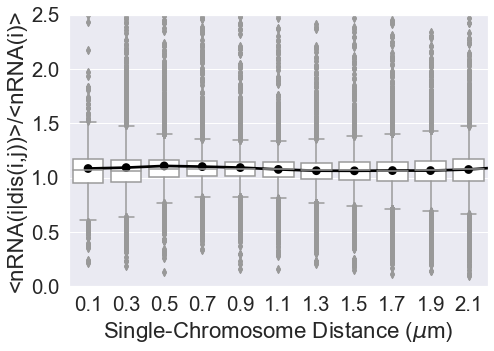

In [13]:
sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Single-Chromosome Distance ($\mu$m)', y='<nRNA(i|dis(i,j))>/<nRNA(i)>',
                    data=dfn, color='white')

ax=sns.pointplot(x='Single-Chromosome Distance ($\mu$m)', y='<nRNA(i|dis(i,j))>/<nRNA(i)>',
                    data=dfn, estimator=mean,color='black')

fig.set_size_inches(7.5,5)
plt.xlim(-.5,10.5)
plt.ylim(0,2.5)

fig.savefig("Figures/"+"Bursting_Freq_Physical_Distance.png", dpi=300, bbox_inches='tight')